## 설 필수과제 
- fdr 데이터를 가지고
- 내가 원하는 기업을 분석해 주시면 되는데, 단순히 하나의 기업이 아닌, 경쟁사(선도기업일 수 있고), 전체 시장에 대한 경쟁사 등 다양한 것을 고려해서 비교가능성이 보일 수 있도록 분석해 주세요!
- 시각화 필수 
- 기본적인 전처리도 필수입니다.

- 반복문을 통해서 최소 5개 이상 시각화해주세요! (컬럼은 최소 4개 이상으로!)
- 재무제표만 가지고 해당 재무성과를 판단하기는 어려울 수 있다.
- 비재무데이터, 신문이나, 뉴스나 등등 해당 분석 과정에서 이상한 점이 발견한다면, 재무외에 비재무적 데이터도 서칭해서 
- 함께 제시해 주세요!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import FinanceDataReader as fdr
import matplotlib.gridspec as gridspec
import matplotlib as mat

ModuleNotFoundError: No module named 'FinanceDataReader'

In [2]:
# 항공사 4곳의 주가를 비교해보았고, 
# 각 항공사들의 주가의 특징은 무엇인지 언제 매수/매도하면 좋을지 알아보았습니다.

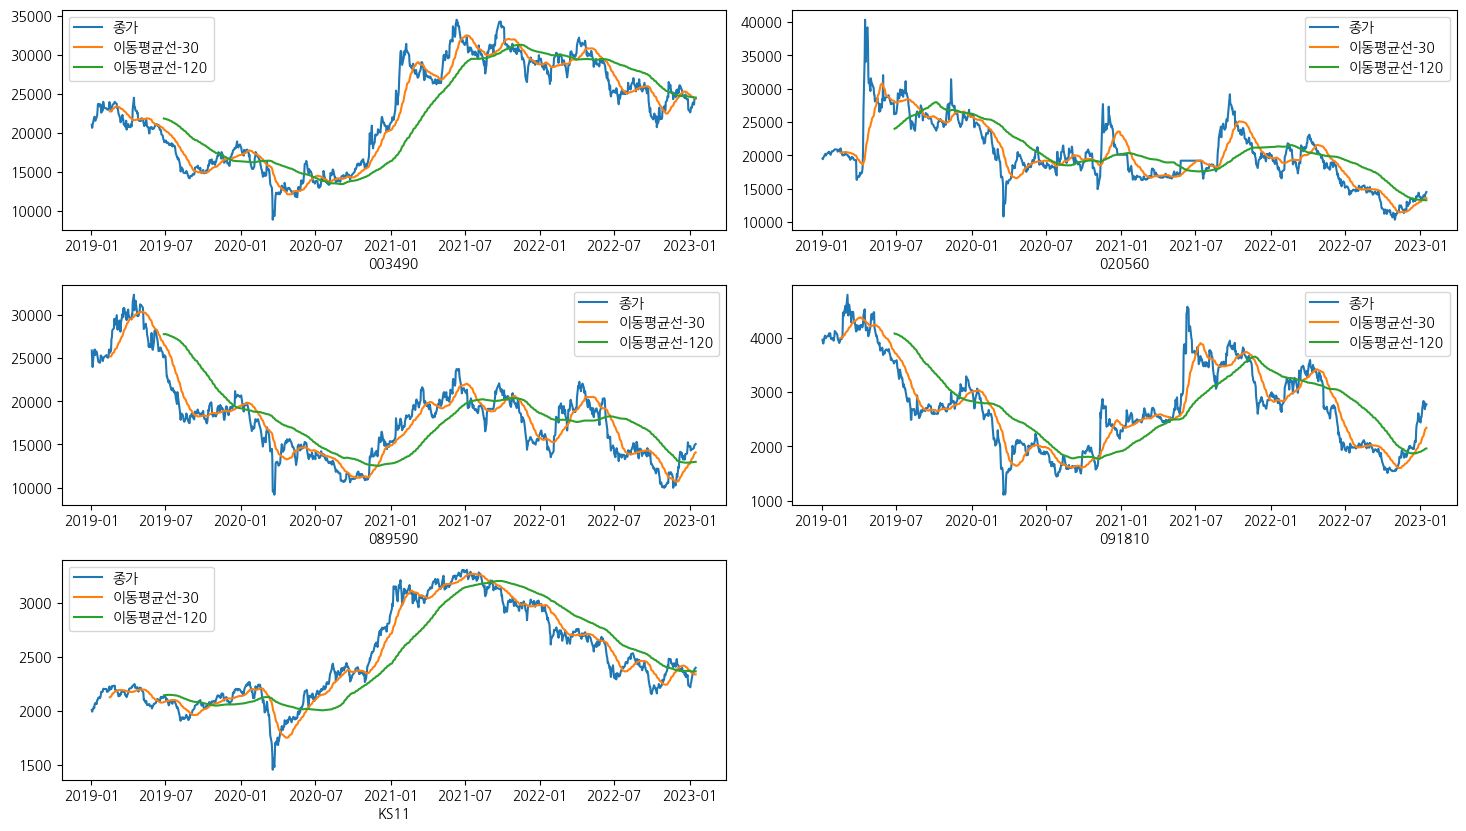

In [3]:
# 한글폰트 깨짐 방지
mat.rcParams['font.family'] = 'NanumGothic'

grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(18,10))
plt.subplots_adjust(wspace= 0.1, hspace=0.25)

# 대한항공(003490), 아시아나항공(020560), 제주항공(089590)
# 티웨이항공(091810), 코스피지수(KS11)를 각각 시각화,
# 60일 동안의 주가 평균선(이동평균선-60), 120일 동안의 주가 평균선(이동평균선-120) 시각화
airlines = ['003490','020560','089590','091810','KS11']
for idx, ticker in enumerate(airlines):
    ax = plt.subplot(grid[idx])
    ax.plot(fdr.DataReader(ticker, start = '2019-01-01').Close, label='종가')
    ax.plot(fdr.DataReader(ticker,start = '2019-01-01').Close.rolling(window=30).mean(), label='이동평균선-30')
    ax.plot(fdr.DataReader(ticker,start = '2019-01-01').Close.rolling(window=120).mean(), label ='이동평균선-120')
    ax.legend()
    plt.xlabel(ticker)

plt.show()

## 특징 분석
대한항공:<br/>코로나로 인하여 2020년 4월 경 주가가 크게 하락한 것을 볼 수 있으나, 그 이후 아시아나항공 합병 이슈 이후 빠른 성장세를 보였다.<br/>하지만 최근 경제 위기로 인해 조금씩 주가가 하락하는 모습이다.<br/><br/>
아시아나항공:<br/>2019년 4월 모 그룹의 매각결정으로 인해 주가가 크게 치솟았으나, 인수가 늦어지고 코로나로 인해 4월 경 폭락을 겪었다.<br/>하지만 대한항공과의 인수병합 결정 이후 주가가 다시금 상승하였다. 그 이후 경제 위기로 폭락하였던 주가는 최근 인수합병 완료를 앞두고 상승하는 중이다.<br/><br/>제주항공:<br/>2019년 실적 악화, 2020년 코로나로 인해 주가가 많이 하락했으나 이후 회복하는 듯 했으나,저비용항공사들의 경쟁과 몇차례의 유상증자로 인해<br/>쉽게 주가를 회복하지 못하는 중이다.<br/><br/>티웨이항공:<br/>제주항공과 비슷하게 실적악화와 코로나로 인해 주가가 많이 떨어졌으나 코로나의 축소 이후 주가가 가파르게 상승하고 있다.

## 매수, 매도 시기 분석
기본적으로 최적의 매수 시기는 30일 이동평균선이, 120일 이동평균선을 넘어설때라고 한다.<br/>주가 특징을 보더라도, 주가가 상승하는 시기의 30일 이동평균선이 120일 이동평균선보다 위에 있음을 볼 수 있다.<br/>몰론 최근 경제 위기로 금리 인상, 주가 하락 등의 이슈가 있지만 항공업계는 코스피와는 다르게 상승하는 모습을 보여주고 있다.<br/>개인적인 생각으론 지금이 대한항공과의 인수합병이 진행 중인 아시아나 항공의 매수 적기인 것 같다. 

In [6]:
a = fdr.DataReader('003490', start='2021-01-01', end='2022-12-31')
a.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-23,24600,24850,24400,24400,801714,-0.020080
2022-12-26,24450,24750,24200,24300,821469,-0.004098
2022-12-27,24550,24650,24050,24200,1557794,-0.004115
2022-12-28,24050,24400,23850,24300,1199728,0.004132
2022-12-29,24100,24150,22850,22950,2038736,-0.055556
